# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [6]:
setwd('C:/Users/keert/BIOS512/R_datasets')
library(tidyverse)
install.packages("Rtsne")
wine_df <- read_csv('wine.csv')
glimpse(wine_df)
wine_df %>%
  summarise(across(where(is.numeric),
                   list(mean = ~mean(.x, na.rm = TRUE),
                        sd   = ~sd(.x, na.rm = TRUE),
                        min  = ~min(.x, na.rm = TRUE),
                        max  = ~max(.x, na.rm = TRUE))))

Installing package into 'C:/Users/keert/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\keert\AppData\Local\Temp\RtmpkB9BtB\downloaded_packages


Rows: 178 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

Alcohol_mean,Alcohol_sd,Alcohol_min,Alcohol_max,Malicacid_mean,Malicacid_sd,Malicacid_min,Malicacid_max,Ash_mean,Ash_sd,⋯,0D280_0D315_of_diluted_wines_min,0D280_0D315_of_diluted_wines_max,Proline_mean,Proline_sd,Proline_min,Proline_max,class_mean,class_sd,class_min,class_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.00062,0.8118265,11.03,14.83,2.336348,1.117146,0.74,5.8,2.366517,0.274344,⋯,1.27,4,746.8933,314.9075,278,1680,1.938202,0.775035,1,3


## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [18]:
wine_scaled <- wine_df %>% mutate(across(-class, function(x) as.numeric(scale(x, center = TRUE, scale = TRUE))))                                    

Scaling and centering help with calculating prinicpal components. Scaling helps apply a scale or bounds to the data and centering provides a centroid or origin point to rotate or reorient the data around. Scaling and centering can reduce the impact of spikes in data. Scaling is also particularly useful when we don't know the importance of variables in the dataset and ensures all variables are equally weighted to calculate variance.  

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [19]:
# Perform PCA
PCA1 <- prcomp(wine_scaled[ ,!(names(wine_scaled) %in% "class")])
summary(PCA1)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

b) The proportion of variance explained by PC1 is 0.9981 and PC2 is 0.00174. You need to use the summary() command to see the information about proportion of variance and cumulative proportion

c) Doing PCA first gives us a basic understanding of how many components seem to be capturing most of the variance in the dataset. It helps reduce the dimensionality of the data while still capturing most of the original information. Can help us remove variables and simplify our dataset for further analysis.

In [17]:
# d) rotation matrix
R <- solve(PCA1$rotation)
print(R)

          Alcohol    Malicacid           Ash Alcalinity_of_ash     Magnesium
PC1  -0.001659262  0.000681019 -0.0001949052      0.0046713046 -0.0178679787
PC2  -0.001204267 -0.002159531 -0.0045939956     -0.0264607000 -0.9993399019
PC3  -0.018303544 -0.124559463 -0.0512928854     -0.9280998612  0.0299845440
PC4  -0.136988601 -0.156739376  0.0120471220      0.3569901026  0.0047541167
PC5  -0.048932608  0.528930958 -0.0258456588     -0.0696112674  0.0064521234
PC6  -0.202080449 -0.803839930 -0.0416939040      0.0238595161  0.0013490076
PC7  -0.890116287  0.146858065 -0.0503492983     -0.0359371988 -0.0020650272
PC8   0.349028029 -0.075520736 -0.1505280897      0.0113920692 -0.0035686385
PC9  -0.104297167 -0.010225516 -0.0688814741      0.0024412832  0.0016323068
PC10  0.057590221 -0.033610083 -0.1071613371     -0.0099803583  0.0008647093
PC11 -0.089074918  0.007743620  0.3532557832     -0.0026586178 -0.0016384061
PC12 -0.034776706  0.035736284 -0.8914868566      0.0593105853  0.0026202766

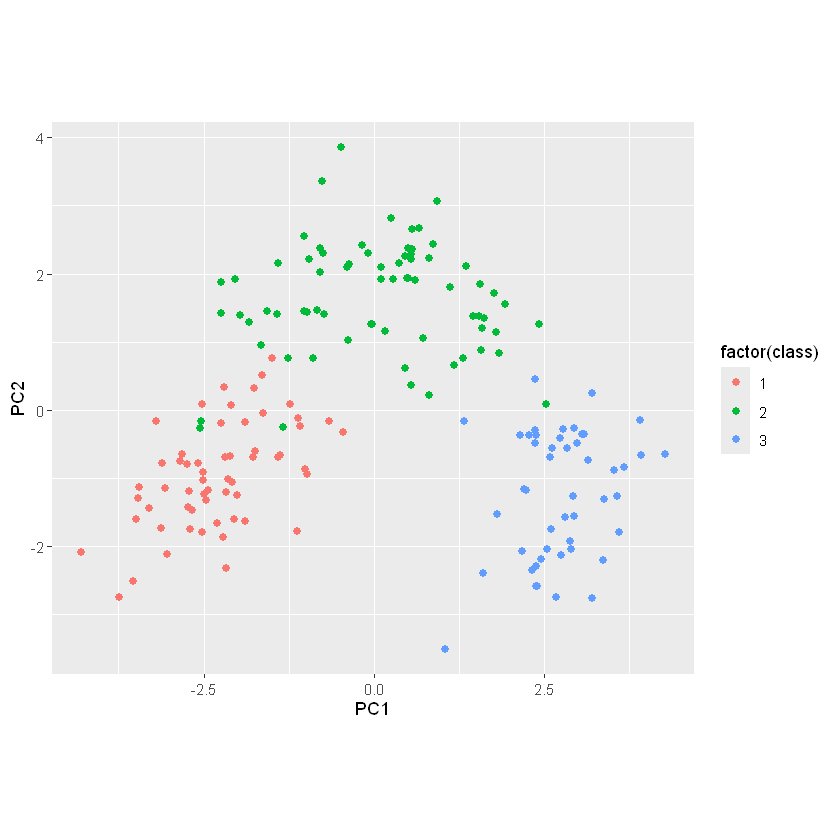

In [22]:
# e) Plot
PC_scores <- as.data.frame(PCA1$x)
PC_plot <- PC_scores %>% mutate(class = wine_scaled$class)
library(ggplot2)
print(ggplot(PC_plot, aes(x=PC1, y=PC2, color = factor(class))) + geom_point(size = 2) + coord_fixed())

f) There seems to be 3 separate clusters based on the class on wine when you use the first 2 principal components to plot.

g) PCA fails if the data is non-linear. For example if the data points are arranged spherically, the components will be random axes and may be different each time.

h) h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.

A vector space is a set of vectors that can be transformed linearly and must always be linear - assumes that the data is entirely on one plane. A manifold can follow the properities of a vector space locally, but when looking globally it can be non-linear. T-SNE assumes that our data is a manifold and allow us to look at data as linear at local points and then put it together to characterize the overall data.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [25]:
# a) T-SNE
library(Rtsne)
PC_subset <- as.data.frame(PCA1$x[, 1:10]) %>% 
  mutate(class = wine_scaled$class) %>% 
  distinct()
set.seed(123)  
tsne_out <- Rtsne(PC_subset %>% select(-class), dims = 2, perplexity = 30)
tsne_df <- as.data.frame(tsne_out$Y) %>% 
  mutate(class = PC_subset$class)
colnames(tsne_df)[1:2] <- c("tSNE1", "tSNE2")

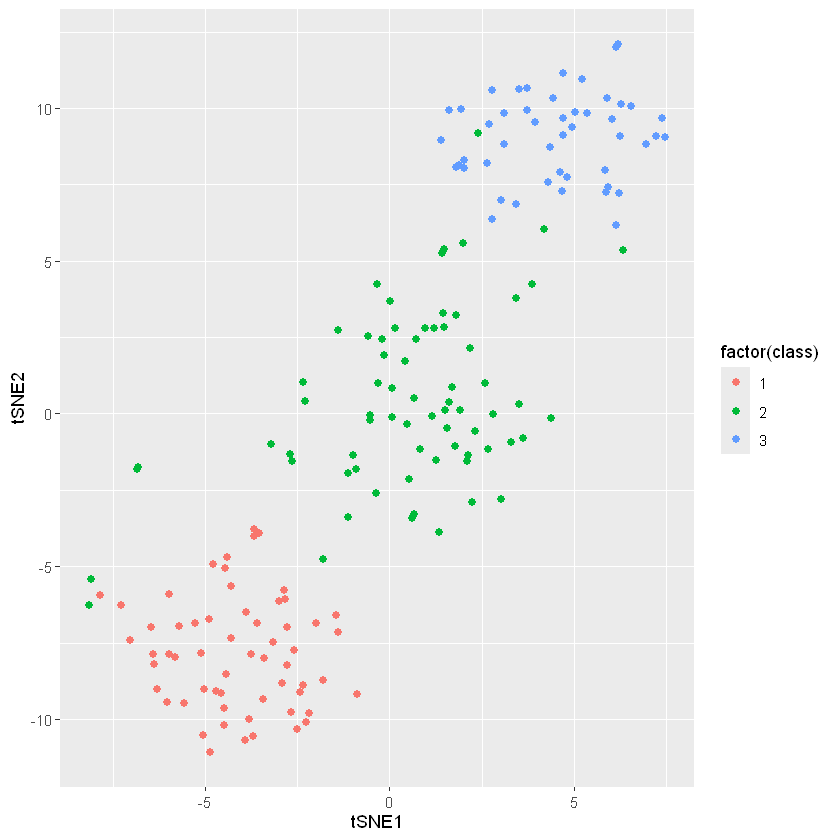

In [26]:
# b) plot
ggplot(tsne_df, aes(x = tSNE1, y = tSNE2, color = factor(class))) +
  geom_point(size = 2)

c) Using T-SNE can check whether the data is actually non-linear globally. If you get different results with PCA and T-SNE, that can suggest that there is some non-linearity in the data

d) You can use this workflow for multiple dimension data - PCA lets you breakdown data into lower dimensions and independent components, then allowing T-SNE to cluster more effectively. Also, used for non-linear data and can capture clusters well in non-linear data